In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing All Packages

In [2]:
import pickle
import cv2
import numpy as np
from tensorflow.keras  import utils
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import callbacks
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
X_data=pickle.load(open("/content/drive/My Drive/Colab Notebooks/EmotionDataset/emotionX.pkl","rb"))
y_data=pickle.load(open("/content/drive/My Drive/Colab Notebooks/EmotionDataset/emotionY.pkl","rb"))

In [0]:
y_data

[4,
 4,
 4,
 4,
 0,
 4,
 0,
 3,
 2,
 0,
 3,
 0,
 3,
 3,
 3,
 2,
 2,
 0,
 3,
 0,
 3,
 3,
 4,
 2,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 4,
 3,
 0,
 0,
 4,
 3,
 0,
 0,
 0,
 4,
 4,
 3,
 3,
 1,
 1,
 4,
 2,
 3,
 4,
 3,
 4,
 1,
 2,
 4,
 1,
 2,
 1,
 2,
 1,
 0,
 3,
 1,
 4,
 0,
 3,
 1,
 0,
 2,
 4,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 1,
 1,
 1,
 4,
 4,
 0,
 3,
 1,
 0,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 0,
 0,
 2,
 1,
 0,
 1,
 3,
 2,
 3,
 4,
 2,
 4,
 2,
 3,
 2,
 3,
 0,
 0,
 4,
 2,
 3,
 1,
 0,
 1,
 1,
 1,
 3,
 4,
 3,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 4,
 2,
 2,
 4,
 0,
 3,
 2,
 1,
 0,
 3,
 0,
 4,
 3,
 4,
 4,
 4,
 2,
 4,
 4,
 3,
 0,
 2,
 3,
 0,
 2,
 4,
 4,
 0,
 1,
 4,
 2,
 3,
 4,
 4,
 0,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 2,
 0,
 4,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 4,
 3,
 4,
 2,
 0,
 1,
 1,
 2,
 3,
 0,
 3,
 4,
 3,
 1,
 1,
 3,
 4,
 3,
 1,
 1,
 3,
 2,
 3,
 3,
 0,
 4,
 1,
 4,
 3,
 0,
 2,
 3,
 1,
 3,
 0,
 3,
 0,
 2,
 2,
 1,
 4,
 0,
 2,
 2,
 1,
 2,
 4,
 3,
 3,
 4,
 4,
 0,
 0,
 4,
 2,
 4,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 3,


In [0]:
print("shape of X",X_data.shape)
print("len of y",len(y_data))
print("len of X",len(X_data))
print(y_data.count(4))

shape of X (40000, 48, 48, 1)
len of y 40000
len of X 40000
8000


In [0]:
X_data=X_data/255

In [0]:
y_label=tf.keras.utils.to_categorical(y_data)

In [0]:
training_x=X_data[:25000]
training_y=y_label[:25000]

In [0]:
print(len(training_x))
print(len(training_y))
print(training_x.shape)

25000
25000
(25000, 48, 48, 1)


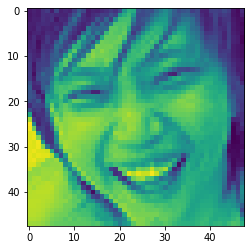

[0. 1. 0. 0. 0.]


In [0]:
plt.imshow(training_x[22432].reshape(48,48))
plt.show()
print(training_y[22432])

In [0]:
y_label

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
#categories
category=['angry','happy','sad','surprise','neutral']
print(len(category))

5


# Model 

In [0]:
model=Sequential()
num_features = 64
num_labels=5
batch_size = 64
epochs = 100


model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=training_x.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))



model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_features,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Checkpoint Paths

In [0]:
checkpoint_path="/content/drive/My Drive/Colab Notebooks/Emotion_recog/model_checkpoint2.ckpt"
checkpoint_callback=callbacks.ModelCheckpoint(checkpoint_path,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            )
early_checkpoints=callbacks.EarlyStopping(monitor='val_acc',  
                                                          patience=6, 
                                                          verbose=1,
                                                          mode='auto',
                                                          restore_best_weights=False)

In [0]:
history=model.fit(training_x,training_y,batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[checkpoint_callback,early_checkpoints],validation_split=0.2,shuffle=True)

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
19968/20000 [============================>.] - ETA: 1s - loss: 1.6773 - acc: 0.2171
Epoch 00001: val_acc improved from -inf to 0.20500, saving model to /content/drive/My Drive/Colab Notebooks/Emotion_recog/model_checkpoint2.ckpt
20000/20000 [==============================] - 812s 41ms/sample - loss: 1.6772 - acc: 0.2171 - val_loss: 1.6098 - val_acc: 0.2050
Epoch 2/100
19968/20000 [============================>.] - ETA: 1s - loss: 1.5904 - acc: 0.2423
Epoch 00002: val_acc did not improve from 0.20500
20000/20000 [==============================] - 807s 40ms/sample - loss: 1.5904 - acc: 0.2421 - val_loss: 1.6024 - val_acc: 0.1974
Epoch 3/100
19968/20000 [============================>.] - ETA: 1s - loss: 1.4947 - acc: 0.3027
Epoch 00003: val_acc improved from 0.20500 to 0.31900, saving model to /content/drive/My Drive/Colab Notebooks/Emotion_recog/model_checkpoint2.ckpt
20000/20000 [==============================] - 813s 41ms/sam

KeyboardInterrupt: ignored

In [0]:
model_change=tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Emotion_recog/model_checkpoint2.ckpt")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
history=model_change.fit(training_x,training_y,batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[checkpoint_callback,early_checkpoints],validation_split=0.2,shuffle=True)

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
19968/20000 [============================>.] - ETA: 1s - loss: 0.2316 - acc: 0.9214
Epoch 00001: val_acc improved from -inf to 0.81020, saving model to /content/drive/My Drive/Colab Notebooks/Emotion_recog/model_checkpoint2.ckpt
20000/20000 [==============================] - 833s 42ms/sample - loss: 0.2315 - acc: 0.9215 - val_loss: 0.7386 - val_acc: 0.8102
Epoch 2/100
19968/20000 [============================>.] - ETA: 1s - loss: 0.2311 - acc: 0.9206
Epoch 00002: val_acc did not improve from 0.81020
20000/20000 [==============================] - 828s 41ms/sample - loss: 0.2308 - acc: 0.9207 - val_loss: 0.7590 - val_acc: 0.8064
Epoch 3/100
19968/20000 [============================>.] - ETA: 1s - loss: 0.2306 - acc: 0.9227
Epoch 00003: val_acc did not improve from 0.81020
20000/20000 [==============================] - 828s 41ms/sample - loss: 0.2308 - acc: 0.9226 - val_loss: 0.7292 - val_acc: 0.8072
Epoch 4/100
19968/20000 [===

In [3]:
model_for_testing=tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Emotion_recog/model_checkpoint2.ckpt")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Save Model

In [0]:
model_for_testing.save("/content/drive/My Drive/Colab Notebooks/Emotion_recog/model_testing.h5")